# Многомерное уравнение переноса

In [11]:
# Импортируем numpy для хранения результатов расчётов
import numpy as np
# Импортируем модуль matplolib для визуализации результатов
import matplotlib.pyplot as plt

In [12]:
# С-х метод на примере 1D уравнения переноса
L = 2.0 # x = [-1,1]
CX = 1.0 # lyambdaX
CY = 1.0 # lyambdaY
T = 1.0 * L / min(abs(CX), abs(CY)) # 1 полный оборот начального возмущения
M = 41 # количество узлов вдоль оси
nx = M
ny = M
h = L / M # шаг по координате, h
dt = 0.4 * h / max(abs(CX), abs(CY))  # коэффициент должен быть меньше единицы
# dtype=[('p', np.float64), ('vx', np.float64)] - имя переменной, тип переменной.
# Скалярное уравнение, но двумерное. Все равно в узле 1 значение.
data_current = np.zeros((M, M), dtype=[('q', np.float64)])
data_next = np.zeros((M, M), dtype=[('q', np.float64)])

# Начальные значения
for j in range(ny):
    for i in range(nx):
        if (i > nx / 3.0) and (i < 2.0 * nx / 3.0) and (j > ny / 3.0) and (j < 2.0 * ny / 3.0):
            data_current[j, i]['q'] = 1.0

In [13]:
# Расчёт
for k in range(int(T / dt)):
    # Шаг по X
    for j in range(ny):
        for i in range(nx):
            if i == 0: # периодические граничные условия
                a = (data_current[j, i + 1]['q'] + data_current[j, M - 1]['q'] - 2 * data_current[j, i]['q']) / (2 * h ** 2)
                b = (data_current[j, i + 1]['q'] - data_current[j, M - 1]['q']) / (2 * h)
            elif i == M - 1:
                a = (data_current[j, 0]['q'] + data_current[j, i - 1]['q'] - 2 * data_current[j, i]['q']) / (2 * h ** 2)
                b = (data_current[j, 0]['q'] - data_current[j, i - 1]['q']) / (2 * h)
            else:
                a = (data_current[j, i + 1]['q'] + data_current[j, i - 1]['q'] - 2 * data_current[j, i]['q']) / (2 * h ** 2)
                b = (data_current[j, i + 1]['q'] - data_current[j, i - 1]['q']) / (2 * h)
            k = CX * dt
            c = data_current[j, i]['q']
            
            # Монотонизация
            v = a * k ** 2 + b * k + c
            data_next[j, i]['q'] = v
            if i == 0:
                min_ = min(data_current[j, M - 1]['q'], data_current[j, i + 1]['q'])
                max_ = max(data_current[j, M - 1]['q'], data_current[j, i + 1]['q'])
            elif i == M - 1:
                min_ = min(data_current[j, i - 1]['q'], data_current[j, 0]['q'])
                max_ = max(data_current[j, i - 1]['q'], data_current[j, 0]['q'])
            else:
                min_ = min(data_current[j, i - 1]['q'], data_current[j, i + 1]['q'])
                max_ = max(data_current[j, i - 1]['q'], data_current[j, i + 1]['q'])
            if v < min_:
                data_next[j, i]['q'] = min_
            elif v > max_:
                data_next[j, i]['q'] = max_
            # data_next[j, i]['q'] = a * k ** 2 + b * k + c
    
    # Шаг по Y
    for j in range(ny):
        for i in range(nx):
            if j == 0: # периодические граничные условия
                a = (data_next[j + 1, i]['q'] + data_next[M - 1, i]['q'] - 2 * data_next[j, i]['q']) / (2 * h ** 2)
                b = (data_next[j + 1, i]['q'] - data_next[M - 1, i]['q']) / (2 * h)
            elif j == M - 1:
                a = (data_next[0, i]['q'] + data_next[j - 1, i]['q'] - 2 * data_next[j, i]['q']) / (2 * h ** 2)
                b = (data_next[0, i]['q'] - data_next[j - 1, i]['q']) / (2 * h)
            else:
                a = (data_next[j + 1, i]['q'] + data_next[j - 1, i]['q'] - 2 * data_next[j, i]['q']) / (2 * h ** 2)
                b = (data_next[j + 1, i]['q'] - data_next[j - 1, i]['q']) / (2 * h)
            k = CY * dt
            c = data_next[j, i]['q']
            
            # Монотонизация
            v = a * k ** 2 + b * k + c
            data_current[j, i]['q'] = v
            if j == 0:
                min_ = min(data_next[M - 1, i]['q'], data_next[j + 1, i]['q'])
                max_ = max(data_next[M - 1, i]['q'], data_next[j + 1, i]['q'])
            elif j == M - 1:
                min_ = min(data_next[j - 1, i]['q'], data_next[0, i]['q'])
                max_ = max(data_next[j - 1, i]['q'], data_next[0, i]['q'])
            else:
                min_ = min(data_next[j - 1, i]['q'], data_next[j + 1, i]['q'])
                max_ = max(data_next[j - 1, i]['q'], data_next[j + 1, i]['q'])
            if v < min_:
                data_current[j, i]['q'] = min_
            elif v > max_:
                data_current[j, i]['q'] = max_
            # data_current[j, i]['q'] = a * k ** 2 + b * k + c

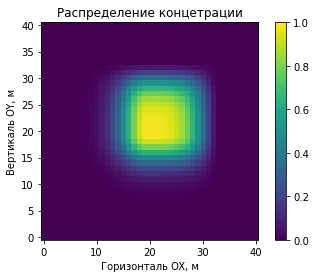

In [15]:
# Отображение 2Д данных цветом
fig, ax = plt.subplots()
ax.set_title('Распределение концетрации')
_ = ax.set_xlabel('Горизонталь OX, м')
_ = ax.set_ylabel('Вертикаль OY, м')
img = ax.imshow(data_current['q'], vmin = 0, vmax = 1, origin ='lower')
_ = fig.colorbar(img)